<div style="
    color: white; 
    background-color: purple; 
    padding: 20px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 20px;
">
    <h1>Data Science Regression Project: Predicting Home Prices in Banglore</h1>
</div>

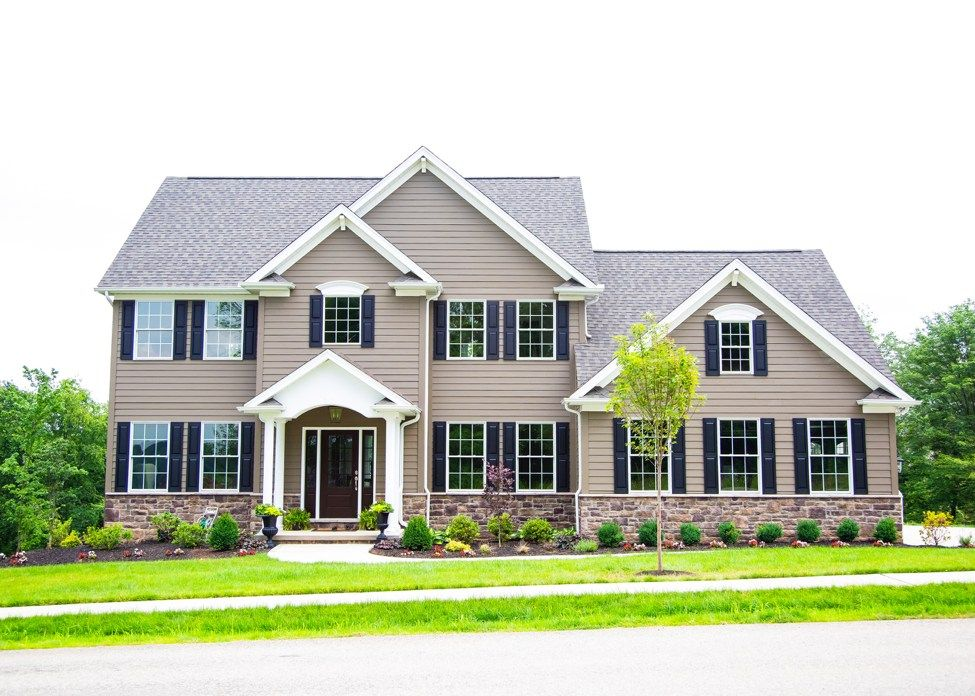

<a href = "https://www.kaggle.com/datasets/snooptosh/bangalore-real-estate-price"> Bangalore-real-estate-price</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="
    color: white; 
    background-color: purple; 
    padding: 20px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 20px;
">
    <h2>Data Load</h2>
</div>

In [2]:
data = pd.read_csv(r'C:\Users\nihar\OneDrive\Desktop\Final_year_project\data\india\Bangalore.csv')

In [3]:
data.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [4]:
data.shape

(13320, 9)

In [5]:
data.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [6]:
data.bath.value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [7]:
data.shape

(13320, 9)

In [8]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

<div style="
    color: white; 
    background-color: purple; 
    padding: 5px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 5px;
">
    <h4>Drop features that are not required to build model</h4>
</div>

In [9]:
data.drop(['area_type','society','balcony','availability'],axis=1, inplace = True)

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h3>EDA</h3>
</div>


In [10]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [12]:
data.describe()

bath         price
count  13247.000000  13320.000000
mean       2.692610    112.565627
std        1.341458    148.971674
min        1.000000      8.000000
25%        2.000000     50.000000
50%        2.000000     72.000000
75%        3.000000    120.000000
max       40.000000   3600.000000

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h2>Data Cleaning </h2>
</div>

In [13]:
data.dropna(inplace = True)
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
data.shape

(13246, 5)

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h3>Feature Engineering</h3>
</div>

**Add new feature(integer) for BHK (Bedrooms Hall Kitchen)**

In [15]:
data['BHK'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [16]:
data.head()

location       size total_sqft  bath   price  BHK
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [17]:
data.describe()

bath         price           BHK
count  13246.000000  13246.000000  13246.000000
mean       2.692586    112.389392      2.801902
std        1.341506    149.076587      1.295758
min        1.000000      8.000000      1.000000
25%        2.000000     50.000000      2.000000
50%        2.000000     72.000000      3.000000
75%        3.000000    120.000000      3.000000
max       40.000000   3600.000000     43.000000

In [18]:
data.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

**Explore total_sqft feature**

In [19]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
data[~data['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  BHK
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [22]:
def convert_sqft_to_num(x):
    try:
        tokens = x.split('-')
        if len(tokens) ==2:
            return (float(tokens[0]) + float(tokens[1]))/2
        return float(x)
    except:
        return None

In [23]:
data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)

In [24]:
data[data.total_sqft.notnull()]
data.head()

location       size  total_sqft  bath   price  BHK
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [25]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

##### it shows total_sqft as 2475 which is an average of the range 2100-2850

In [26]:
np.mean([2100, 2850])

2475.0

**Add new feature called price per square feet**

In [27]:
data['price_per_sqft'] = data['price']*100000/data['total_sqft']
data.head()

location       size  total_sqft  bath   price  BHK  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [28]:
data.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [29]:
data.to_csv("bhp.csv",index=False)

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [30]:
data.location = data.location.apply(lambda x: x.strip())
loc_stat = data['location'].value_counts(ascending=False)
loc_stat

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [31]:
loc_stat.values.sum()

13246

In [32]:
len(loc_stat[loc_stat>10])

241

In [33]:
len(loc_stat)

1293

In [34]:
len(loc_stat[loc_stat<=10])

1052

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h2>Dimensionality Reduction</h2>
</div>

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [35]:
data.location = data.location.apply(lambda x:'others' if x in loc_stat[loc_stat<=10] else x)

In [36]:
data.location.nunique()

242

In [37]:
data.head(2)

location       size  total_sqft  bath   price  BHK  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   

   price_per_sqft  
0     3699.810606  
1     4615.384615

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h3>Outlier Removal Using Business Logic</h3>
</div>

**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [38]:
data[data.total_sqft/data.BHK<300].head(2)

location       size  total_sqft  bath  price  BHK  price_per_sqft
9       others  6 Bedroom      1020.0   6.0  370.0    6    36274.509804
45  HSR Layout  8 Bedroom       600.0   9.0  200.0    8    33333.333333

**Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 9 bhk and total sqft is 600. These are clear data errors that can be removed safely**

In [39]:
data.shape

(13246, 7)

In [40]:
data = data[~(data.total_sqft/data.BHK<300)]

In [41]:
data.shape

(12502, 7)

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h3>Outlier Removal Using Standard Deviation and Mean</h3>
</div>

In [42]:
data.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [43]:
def price_per_sqft_otliers(data):
    df = pd.DataFrame()
    for k, subdf in data.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft > (mean-std)) & (subdf.price_per_sqft <= (mean+std))]
        df = pd.concat([df, reduce_df],ignore_index=True)
    return df

In [44]:
data = price_per_sqft_otliers(data)
data.shape

(10241, 7)

In [45]:
data.head()

location   size  total_sqft  bath  price  BHK  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668

In [46]:
data.BHK.value_counts()

BHK
2     4756
3     4002
4      745
1      518
5      108
6       62
7       19
8       16
9        8
10       3
11       2
16       1
13       1
Name: count, dtype: int64

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

In [47]:
def plot_scatter(data, loc):
    bhk_2 = data[(data.location==loc) & (data.BHK==2)]
    bhk_3 = data[(data.location==loc) & (data.BHK==3)]
    
    plt.figure(figsize=(12,10))
    plt.scatter(bhk_2.total_sqft, bhk_2.price, color='blue', label = '2 BHK', s= 50)
    plt.scatter(bhk_3.total_sqft, bhk_3.price, color='red', marker='+', label='3 BHK', s=50)
    plt.title(loc)
    plt.xlabel('Total Sqaure Feet Area')
    plt.ylabel('Price(Lakhs Indian Rupeeees)')
    plt.legend()

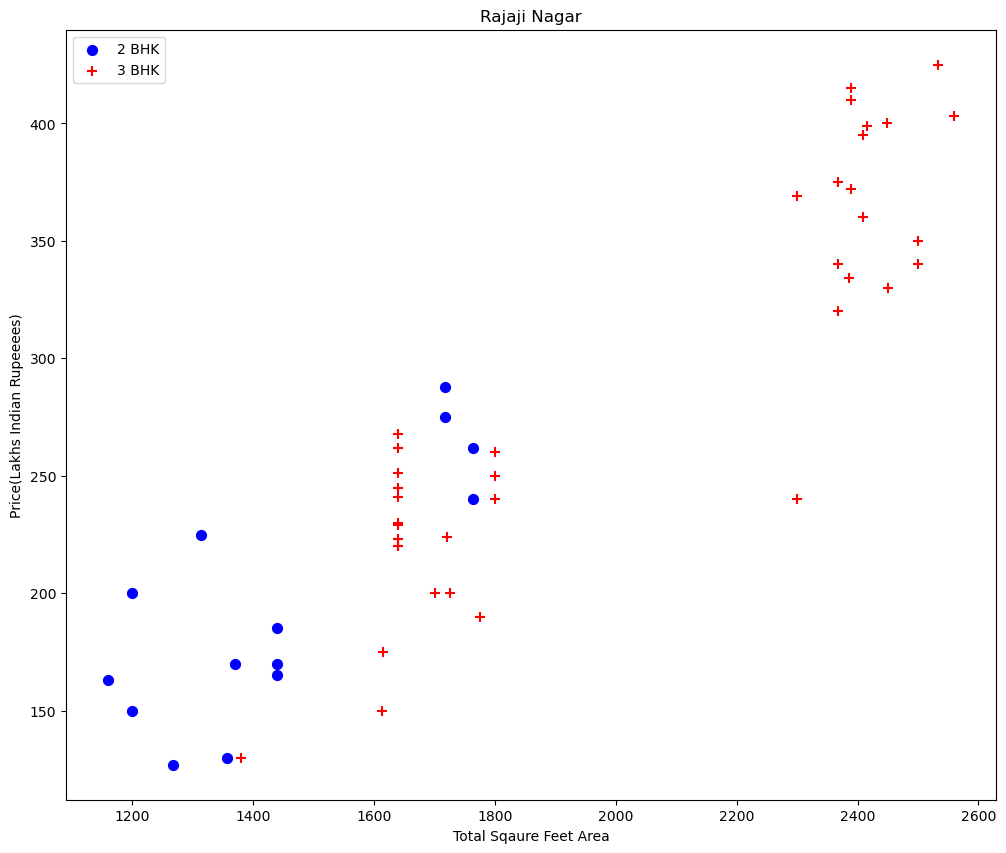

In [48]:
plot_scatter(data, "Rajaji Nagar")

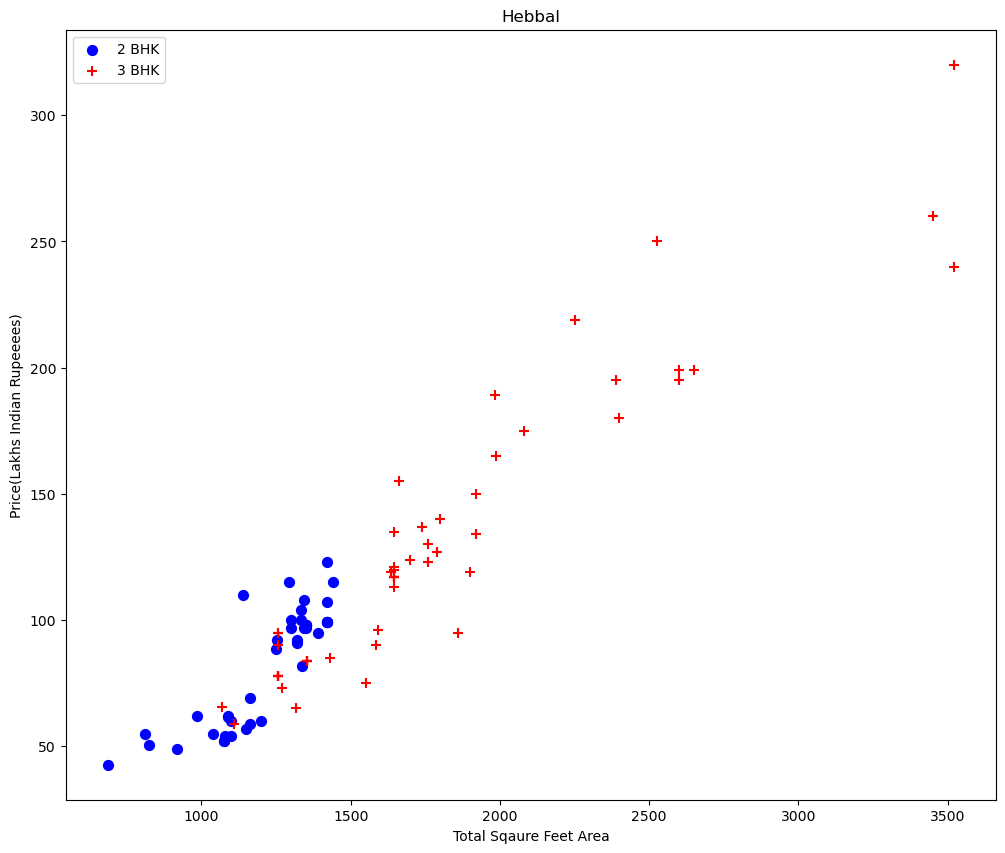

In [49]:
plot_scatter(data, "Hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

    {
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [50]:
def bhk_outliers(data):
    idx = np.array([])
    for loc, loc_df in data.groupby('location'):
        bhk_stat = {}
        for bhk, bhk_df in loc_df.groupby('BHK'):
            bhk_stat[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby('BHK'):
            stat = bhk_stat.get(bhk-1)
            if stat and stat['count'] >5:
                idx = np.append(idx, bhk_df[bhk_df.price_per_sqft<(stat['mean'])].index.values)
    return data.drop(idx)
    

In [51]:
data = bhk_outliers(data)
data.shape

(7329, 7)

**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

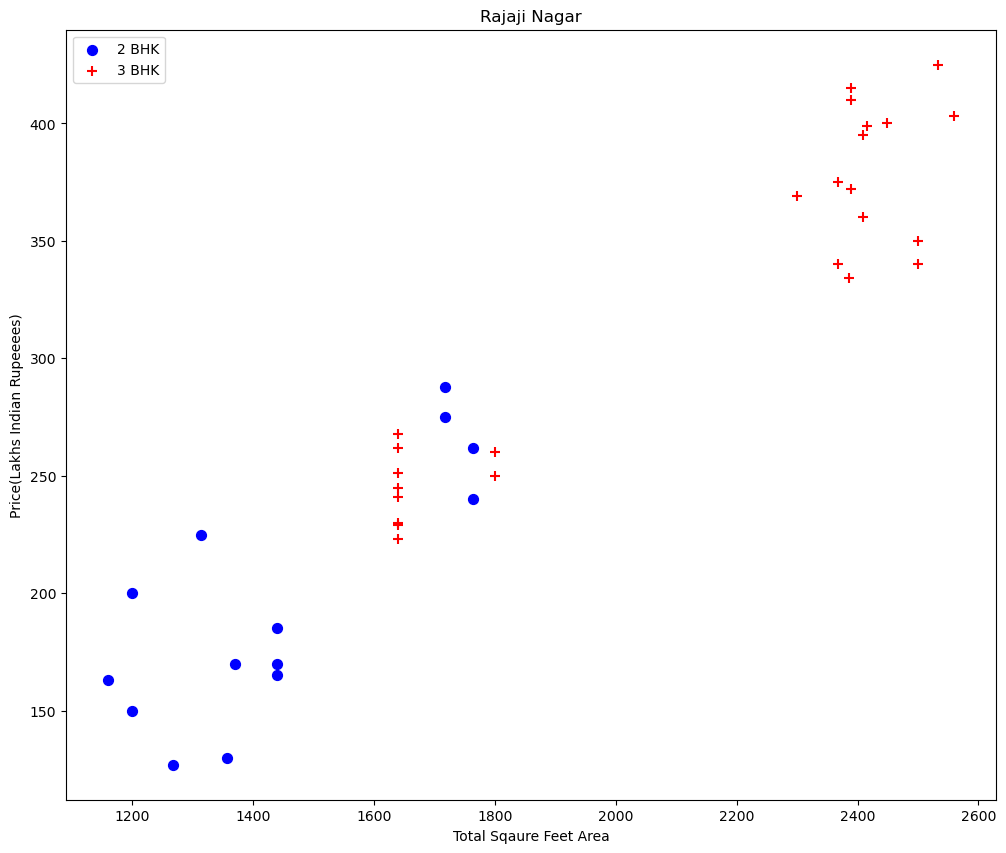

In [52]:
plot_scatter(data, "Rajaji Nagar")

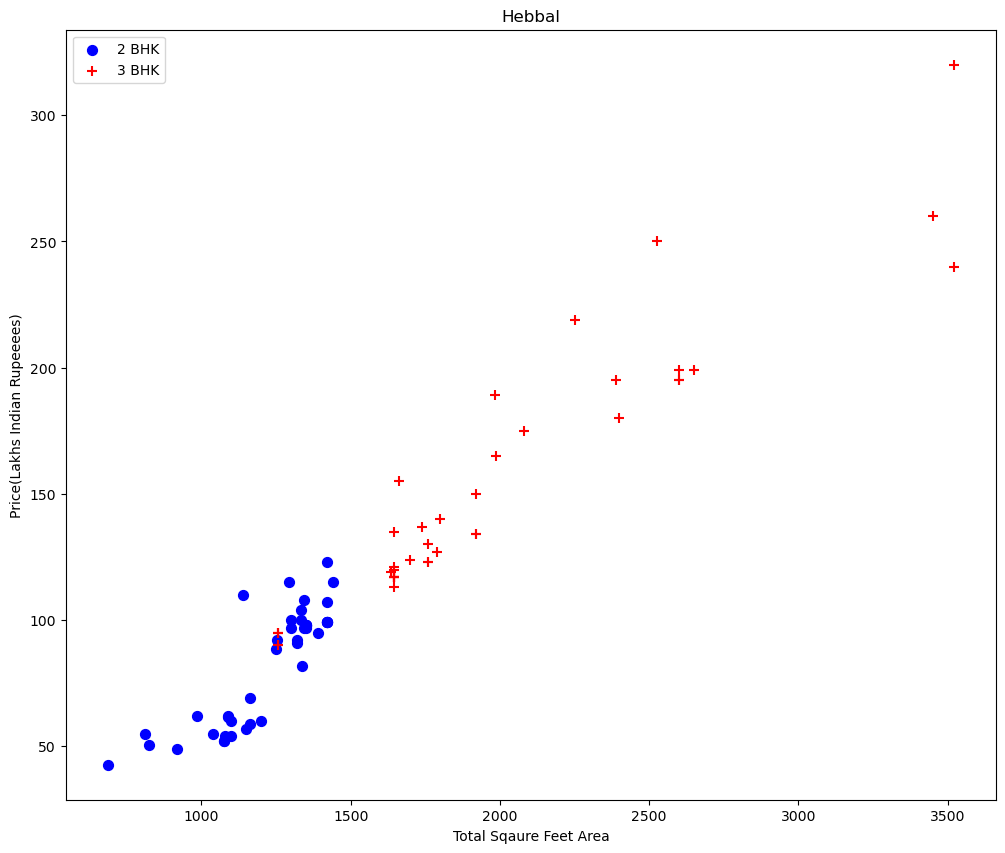

In [53]:
plot_scatter(data, "Hebbal")

**Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function**

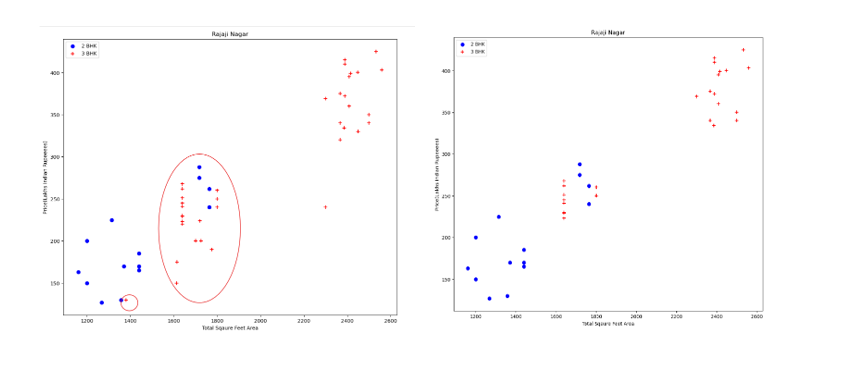

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h1>Before and After Outlier Remove: Hebbal</h1>
</div>

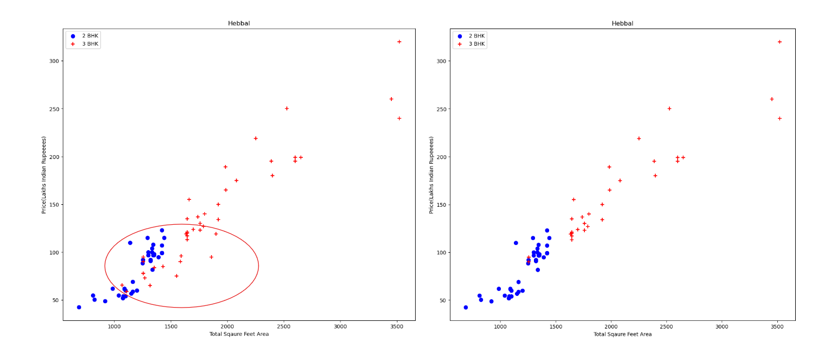


<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h2>Data Visualization</h2>
</div>

In [54]:
plt.rcParams['figure.figsize'] = (20, 10)

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


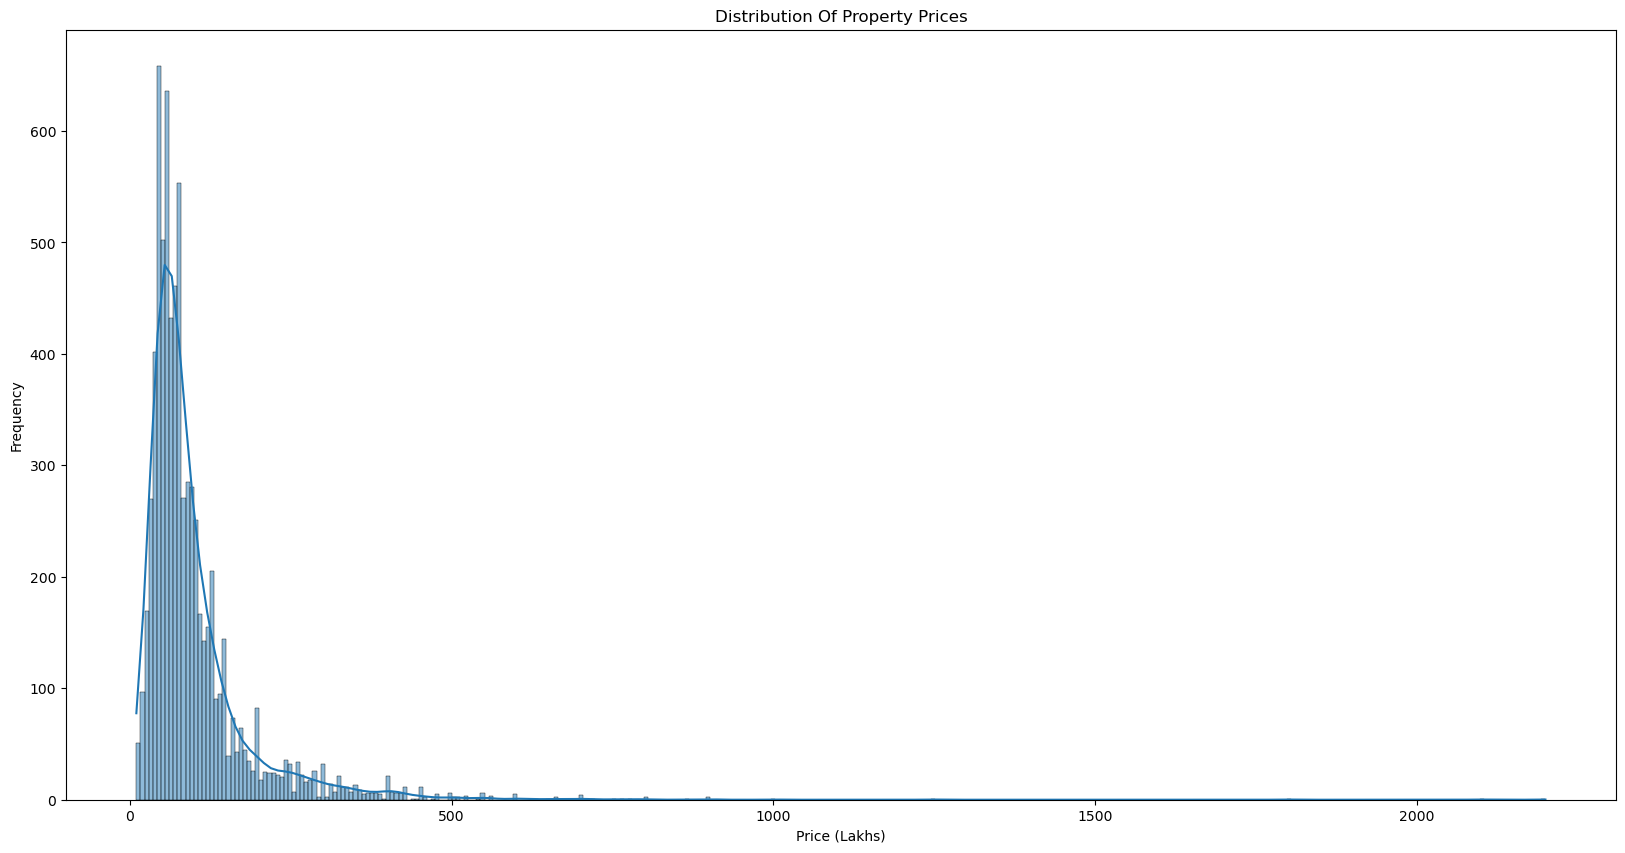

In [55]:
sns.histplot(data['price'], kde=True)
plt.title('Distribution Of Property Prices')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Frequency')
plt.show()

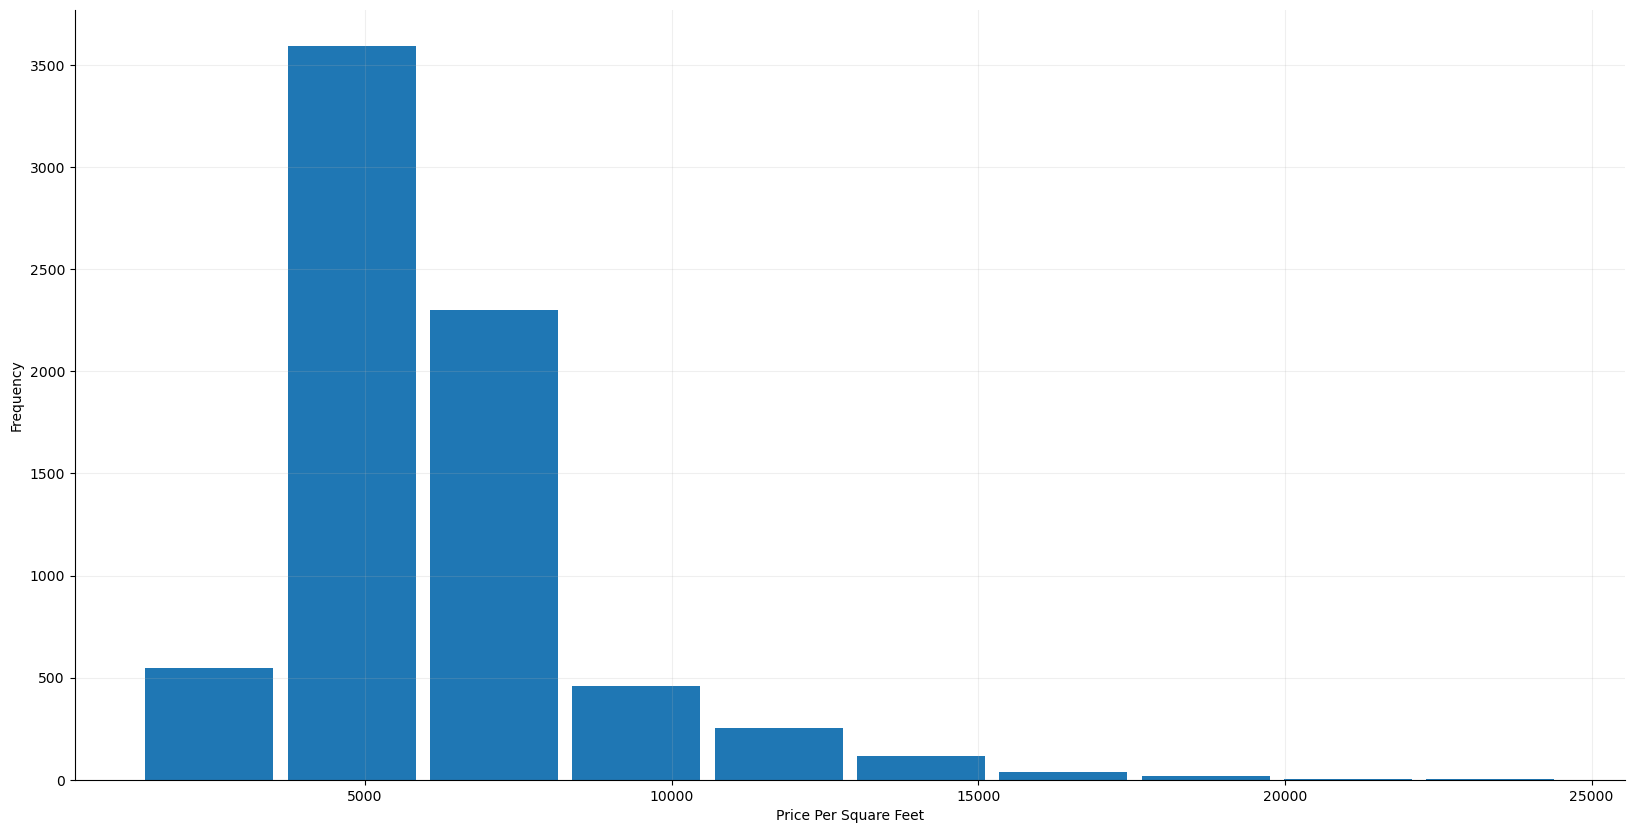

In [56]:
plt.hist(data.price_per_sqft, rwidth =0.9, )
plt.xlabel('Price Per Square Feet')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
sns.despine()
plt.show()


<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h3>Outlier Removal Using Bathrooms Feature</h3>
</div>

In [57]:
data.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

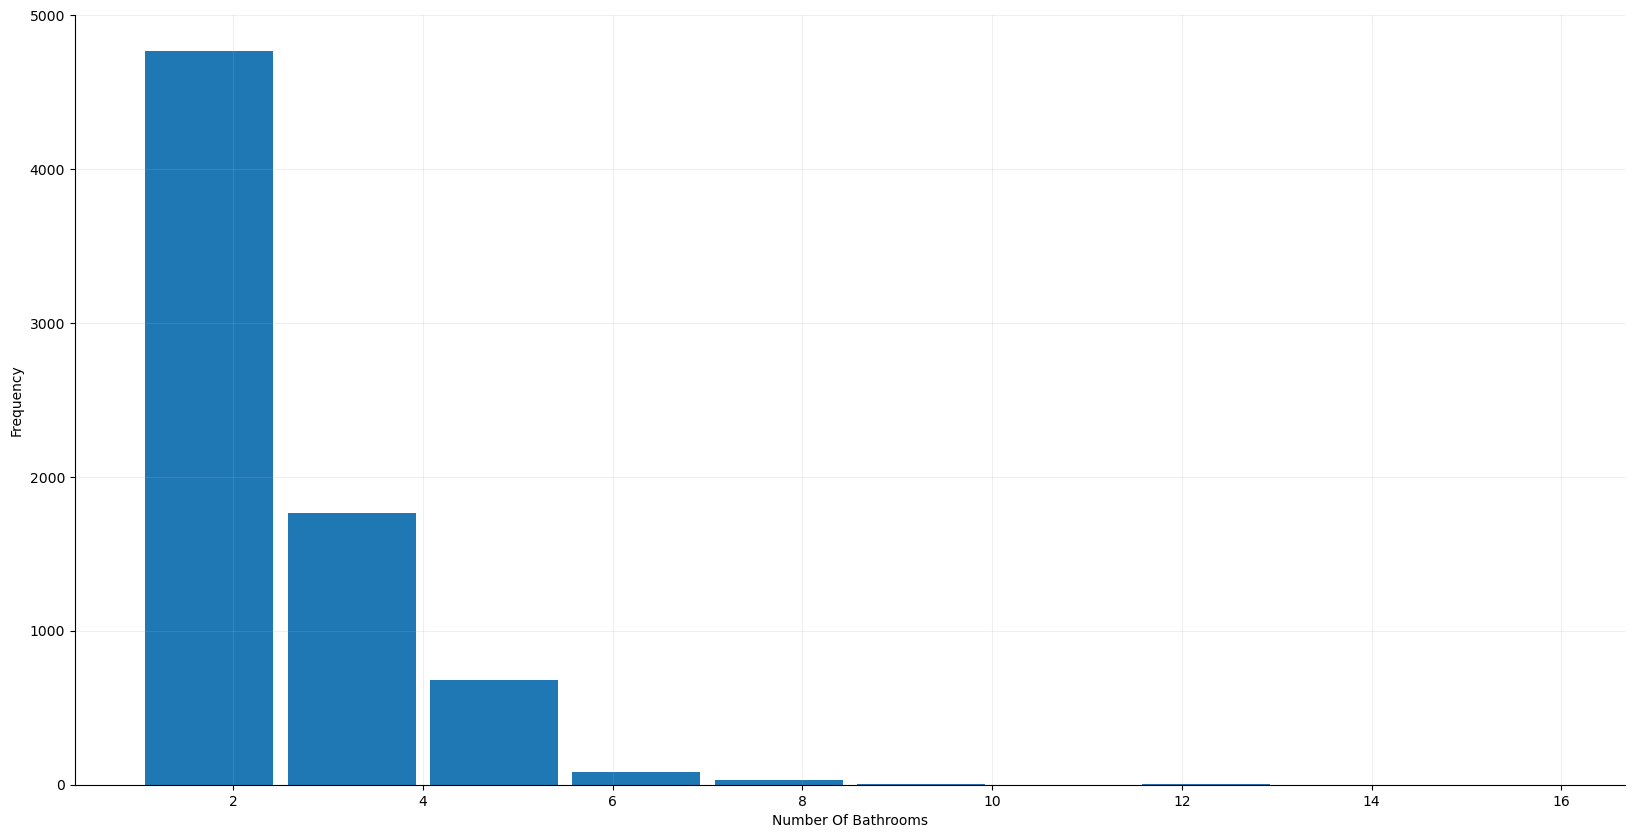

In [58]:
plt.hist(data.bath, rwidth=0.9)
plt.xlabel('Number Of Bathrooms')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
sns.despine()
plt.show()

In [59]:
data[data.bath>10]

location    size  total_sqft  bath  price  BHK  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8486          others  10 BHK     12000.0  12.0  525.0   10     4375.000000
8575          others  16 BHK     10000.0  16.0  550.0   16     5500.000000
9308          others  11 BHK      6000.0  12.0  150.0   11     2500.000000
9639          others  13 BHK      5425.0  13.0  275.0   13     5069.124424

**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [60]:
data[data.bath>data.BHK+2]

location       size  total_sqft  bath   price  BHK  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8411         others      6 BHK     11338.0   9.0  1000.0    6     8819.897689

**if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [61]:
data = data[data.bath<data.BHK+2]
data.shape

(7251, 7)

In [62]:
data.head(2)

location   size  total_sqft  bath  price  BHK  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491

In [63]:
data.drop(['size', 'price_per_sqft'],axis =1, inplace=True)

In [64]:
data.head(3)

location  total_sqft  bath  price  BHK
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3

In [65]:
num_fea = ['bath', 'BHK', 'total_sqft','price']

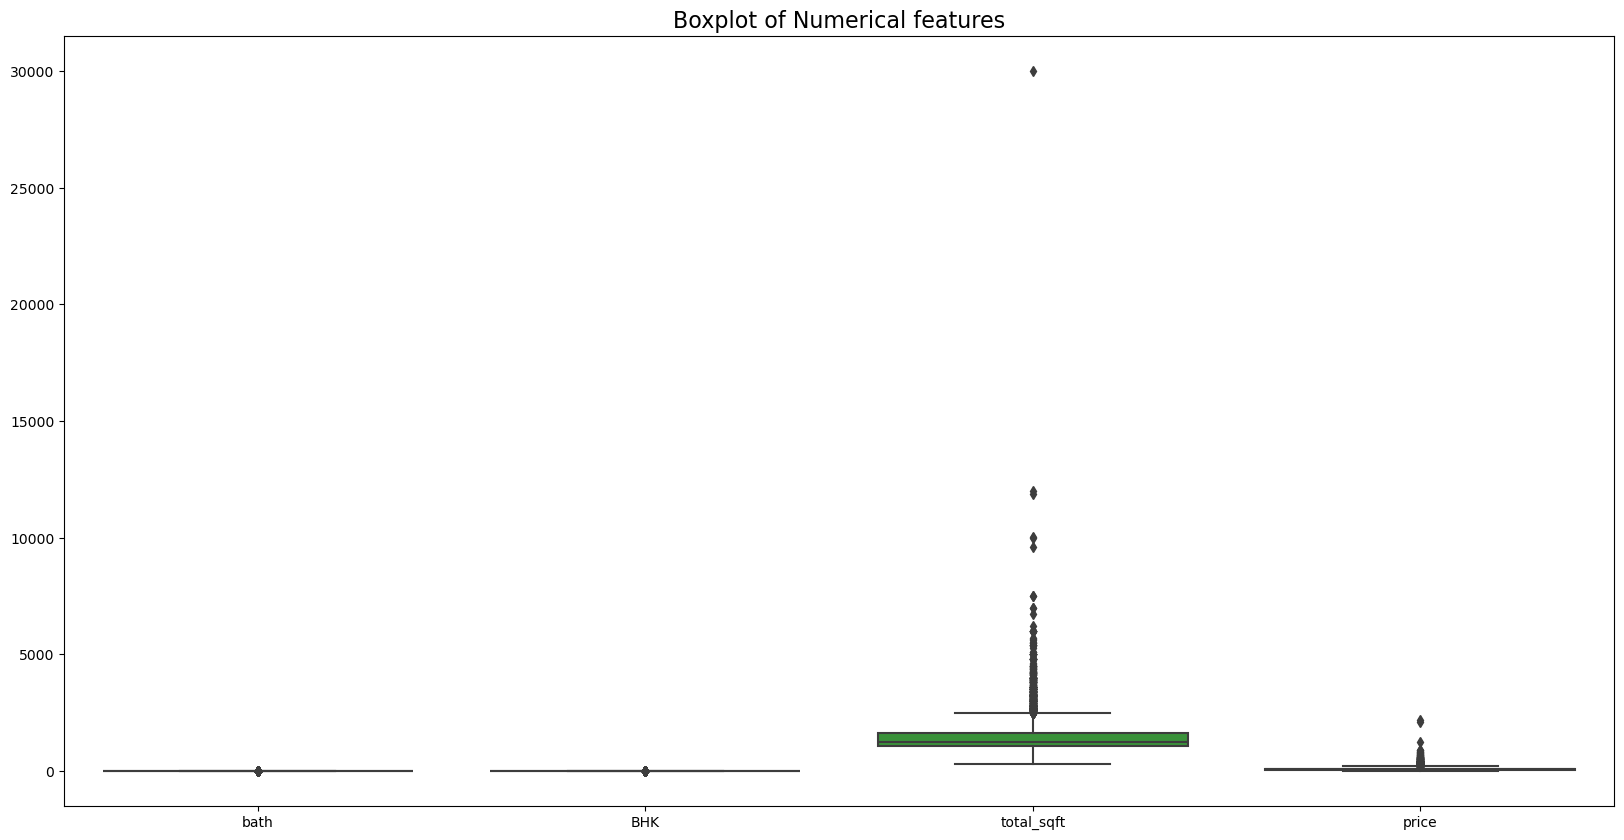

In [66]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data[num_fea])
plt.title("Boxplot of Numerical features", fontsize=16)
plt.show()

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h3>Histogram </h3>
</div>

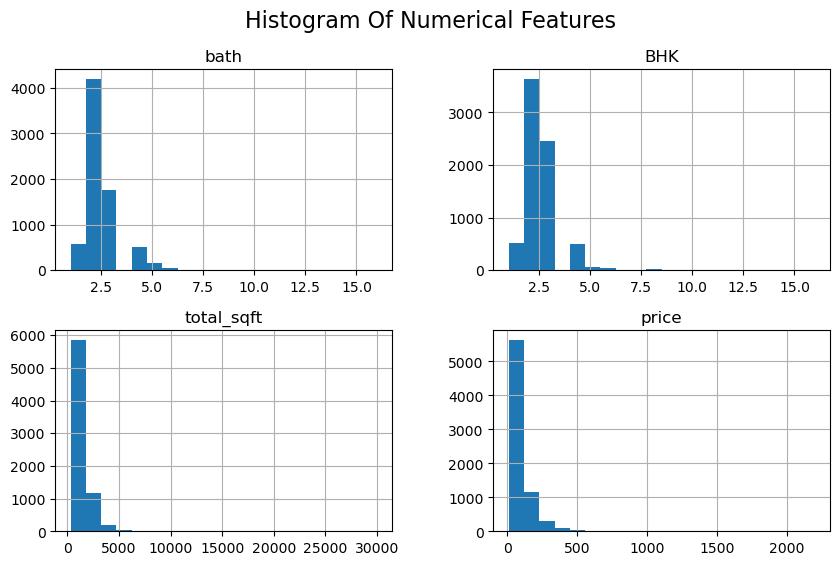

In [67]:
data[num_fea].hist(bins=20, figsize=(10,6))
plt.suptitle('Histogram Of Numerical Features', fontsize=16)
plt.show()


<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h3>Pair Plot</h3>
</div>

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

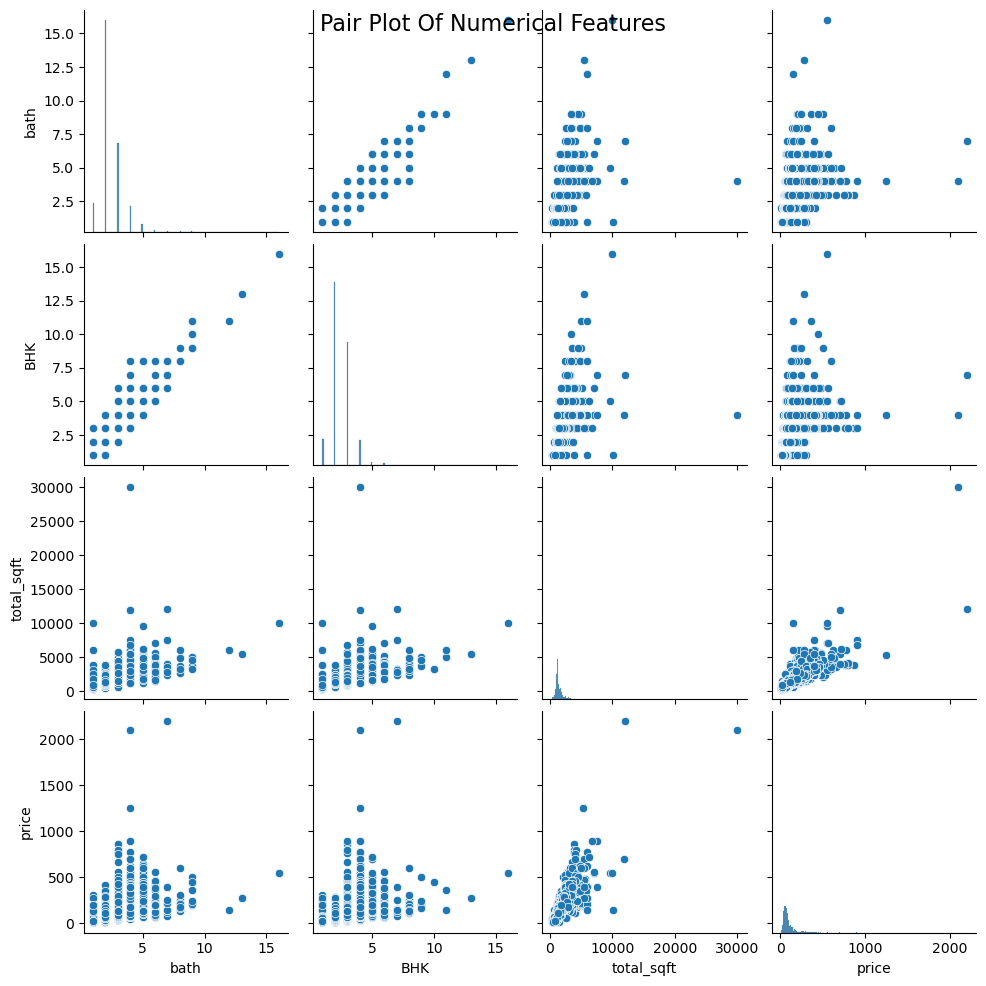

In [68]:
sns.pairplot(data = data[num_fea])
plt.suptitle("Pair Plot Of Numerical Features", fontsize=16)
plt.show()


<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h3>Correlation heatmap </h3>
</div>

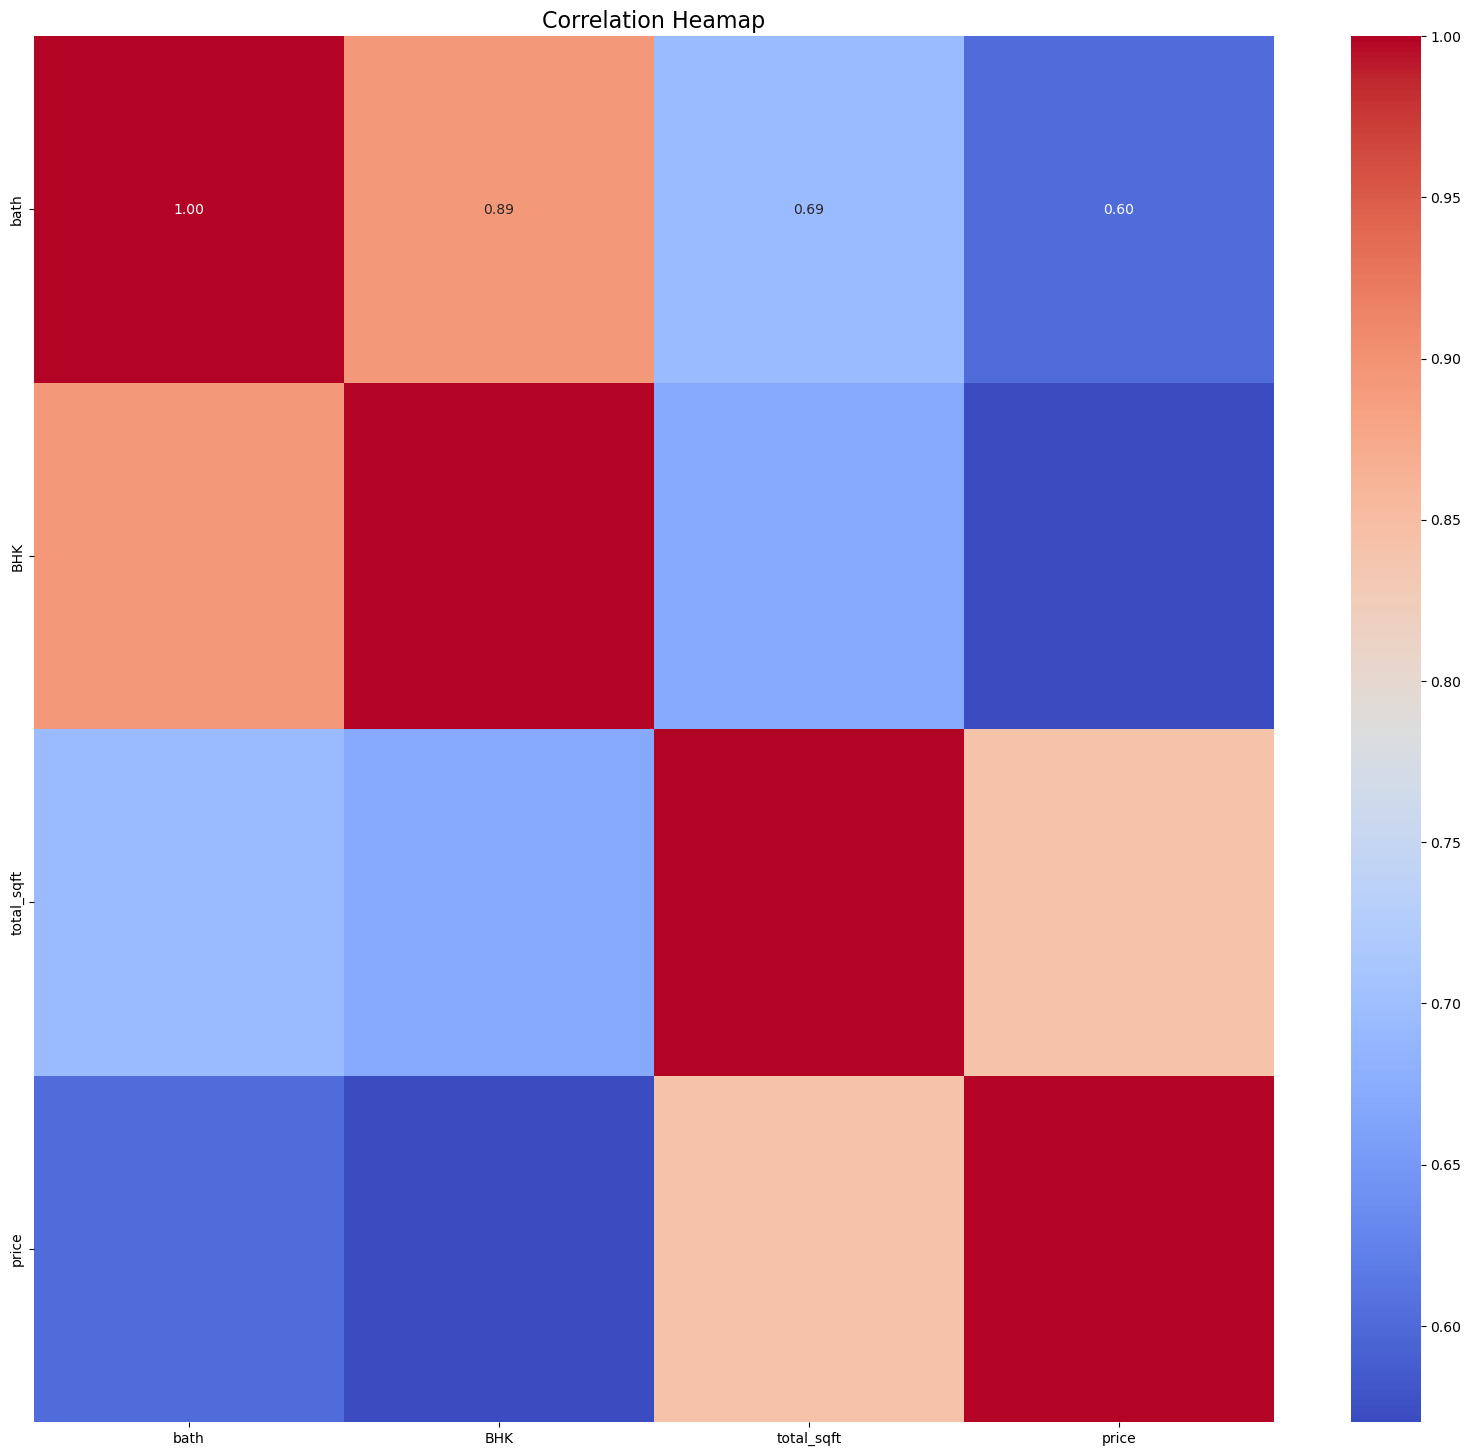

In [70]:
plt.figure(figsize=(20, 18))
sns.heatmap(data[num_fea].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heamap",fontsize=16)
plt.show()

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h2>Encoding the categorical data</h2>
</div>

In [71]:
data = pd.get_dummies(data)
data.head()

total_sqft  bath  price  BHK  location_1st Block Jayanagar  \
0      2850.0   4.0  428.0    4                          True   
1      1630.0   3.0  194.0    3                          True   
2      1875.0   2.0  235.0    3                          True   
3      1200.0   2.0  130.0    3                          True   
4      1235.0   2.0  148.0    2                          True   

   location_1st Phase JP Nagar  location_2nd Phase Judicial Layout  \
0                        False                               False   
1                        False                               False   
2                        False                               False   
3                        False                               False   
4                        False                               False   

   location_2nd Stage Nagarbhavi  location_5th Block Hbr Layout  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   

   location_5th Phase JP Nagar  ...  location_Vishveshwarya Layout  \
0                        False  ...                          False   
1                        False  ...                          False   
2                        False  ...                          False   
3                        False  ...                          False   
4                        False  ...                          False   

   location_Vishwapriya Layout  location_Vittasandra  location_Whitefield  \
0                        False                 False                False   
1                        False                 False                False   
2                        False                 False                False   
3                        False                 False                False   
4                        False                 False                False   

   location_Yelachenahalli  location_Yelahanka  location_Yelahanka New Town  \
0                    False               False                        False   
1                    False               False                        False   
2                    False               False                        False   
3                    False               False                        False   
4                    False               False                        False   

   location_Yelenahalli  location_Yeshwanthpur  location_others  
0                 False                  False            False  
1                 False                  False            False  
2                 False                  False            False  
3                 False                  False            False  
4                 False                  False            False  

[5 rows x 246 columns]

In [72]:
data.drop(['location_others'],axis=1,inplace = True)

<div style="
    color: white; 
    background-color: purple; 
    padding: 20px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 20px;
">
    <h2>Model Building</h2>
</div>

In [73]:
data.shape

(7251, 245)

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h2>1.Linear Regression </h2>
</div>

In [77]:
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [78]:
X = data.drop('price',axis=1)
y = data['price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=43)

In [80]:
## Training the model
Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)

LinearRegression()

In [81]:
### Predict
y_pred = Linear_reg.predict(X_test)

<div style="
    color: white; 
    background-color: purple; 
    padding: 5px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 5px;
">
    <h4>Evaluation Of Model </h4>
</div>

In [82]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
score = r2_score(y_test, y_pred)

In [83]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score of the Model: {score*100:.2f} %")

Mean Absolute Error (MAE): 18.49
Mean Squared Error (MSE): 2001.93
Root Mean Squared Error (RMSE): 44.74
Score of the Model: 79.33 %


In [84]:
cv  = ShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.79329881, 0.79766778, 0.85299138, 0.85617931, 0.88082096])

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h2>2.Random Forest Regression</h2>
</div>

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [86]:
rf_model = RandomForestRegressor()

In [87]:
params = {
    'n_estimators':[100, 200, 300, 400],
    'max_depth':[10, 20, 30, None],
    'min_samples_split':[2, 5, 7, 10],
    'min_samples_leaf':[1, 2, 3, 4],
}

In [88]:
### Grid Search with cross Validation 
gd_model = GridSearchCV(estimator=rf_model, param_grid=params, cv=cv, n_jobs=-1, verbose=2)
gd_model.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=43, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [89]:
bst_params = gd_model.best_params_
print("Best parameters:", bst_params)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [90]:
# Training of the model
best_model = gd_model.best_estimator_
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=5)

In [91]:
# Predict
y_pred = best_model.predict(X_test)

<div style="
    color: white; 
    background-color: purple; 
    padding: 5px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 5px;
">
    <h4>Evaluate the model</h4>
</div>

In [92]:
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
r2_rf = r2_score(y_test, y_pred)

In [93]:
print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R2 Score of Random Forest: {r2_rf*100:.2f}%")

Random Forest Mean Absolute Error (MAE): 19.149595550099637
Random Forest Mean Squared Error (MSE): 3126.605445673076
Random Forest Root Mean Squared Error (RMSE): 55.91605713632781
R2 Score of Random Forest: 67.72%


<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h2>3. XG Boost</h2>
</div>

In [94]:
from xgboost import XGBRegressor

In [95]:
xgb_model = XGBRegressor(objective='reg:squarederror')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}


In [96]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9, 1.0]},
             verbose=2)

In [97]:
best_param = grid_search.best_params_
print("Best parameters:", best_param)

Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}


In [98]:
## Train the model
xgb_model = grid_search.best_estimator_
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [99]:
## Predict 
y_pred = xgb_model.predict(X_test)

<div style="
    color: white; 
    background-color: purple; 
    padding: 5px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 5px;
">
    <h4>Evaluate the model</h4>
</div>

In [100]:
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = mean_squared_error(y_test, y_pred, squared=False)
r2_xgb = r2_score(y_test, y_pred)

In [101]:
print(f"XGBoost Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R2 Score of XGBoost: {r2_xgb*100:.2f}%")

XGBoost Mean Absolute Error (MAE): 17.59559833226904
XGBoost Mean Squared Error (MSE): 3322.543243119477
XGBoost Root Mean Squared Error (RMSE): 57.641506253041975
R2 Score of XGBoost: 65.69%


<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h2>4.Lasso </h4>
</div>

In [102]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [103]:
lasso = Lasso()
params = {
    'alpha':[1,2],
    'selection':['random', 'cyclic']
}

In [104]:
lasso_grid = GridSearchCV(lasso, params, cv = cv, return_train_score=False)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=43, test_size=0.2, train_size=None),
             estimator=Lasso(),
             param_grid={'alpha': [1, 2], 'selection': ['random', 'cyclic']})

In [105]:
y_pred = lasso_grid.predict(X_test)

<div style="
    color: white; 
    background-color: purple; 
    padding: 5px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 5px;
">
    <h4> Evaluation </h4>
</div>

In [106]:
mae_lasso = mean_absolute_error(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred)

In [107]:
print(f"Lasso Regression Mean Absolute Error (MAE): {mae_lasso}")
print(f"Lasso Regression Mean Squared Error (MSE): {mse_lasso}")
print(f"Lasso Regression Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"Lasso Regression R² score: {r2_lasso*100:.2f}%")

Lasso Regression Mean Absolute Error (MAE): 25.476937936871245
Lasso Regression Mean Squared Error (MSE): 3200.0324202852285
Lasso Regression Root Mean Squared Error (RMSE): 56.56882905174216
Lasso Regression R² score: 66.96%


<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h2>5.Decision Tree Regression</h2>
</div>

In [108]:
decision_tree = DecisionTreeRegressor(random_state=42)

In [109]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [110]:
grid_search_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
grid_search_tree.fit(X_train, y_train)
best_tree = grid_search_tree.best_estimator_

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


In [111]:
y_pred = best_tree.predict(X_test)

<div style="
    color: white; 
    background-color: purple; 
    padding: 5px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 5px;
">
    <h4>Evaluation</h4>
</div>

In [112]:
mae_tree = mean_absolute_error(y_test, y_pred)
mse_tree = mean_squared_error(y_test, y_pred)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred)

In [113]:
print("Best parameters:", grid_search_tree.best_params_)

Best parameters: {'criterion': 'squared_error', 'max_depth': 40, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [114]:
print(f"Decision Tree Regressor Mean Absolute Error (MAE): {mae_tree}")
print(f"Decision Tree Regressor Mean Squared Error (MSE): {mse_tree}")
print(f"Decision Tree Regressor Root Mean Squared Error (RMSE): {rmse_tree}")
print(f"Decision Tree Regressor R² score: {r2_tree*100:.2f}%")

Decision Tree Regressor Mean Absolute Error (MAE): 21.03709870996825
Decision Tree Regressor Mean Squared Error (MSE): 3351.576946664483
Decision Tree Regressor Root Mean Squared Error (RMSE): 57.89280565549128
Decision Tree Regressor R² score: 65.39%


<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h2>Display Result </h2>
</div>

In [115]:
def display_result(metrics):
    print("\nModel Performance Metrics:\n")
    for model, metric in metrics.items():
        print(f"{model} Performace: ")
        for m, v in metric.items():
            print(f"{m}: {v*100:.2f}%")
        print("\n"+"-"*30+"\n")

    # Visualize the results
    df = pd.DataFrame(metrics).T

    # Plotting the metrics
    plt.figure(figsize=(14, 8))

    # Plot each metric
    for metric in df.columns:
        plt.plot(df.index, df[metric], marker='o', label=metric)

    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Model Performance Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()

In [116]:
metrics = {
    'Linear_reg':{
        'MAE': mae,
        'MSE':mse,
        'RMSE':rmse,
        'r2_score':score
        
    },
    'lasso_grid':{
        'MAE': mae_lasso,
        'MSE':mse_lasso,
        'RMSE':rmse_lasso,
        'r2_score':r2_lasso
    },
    'best_tree':{
        'MAE': mae_tree,
        'MSE':mse_tree,
        'RMSE':rmse_tree,
        'r2_score':r2_tree
    },
    
    'best_model':{
        'MAE':mae_rf,
        'MSE':mse_rf,
        'RMSE':rmse_rf,
        'r2_score':r2_rf
    },
    'xgb_model':{
        'MAE':mae_xgb,
        'MSE':mse_xgb,
        'RMSE':rmse_xgb,
        'r2_score':r2_xgb
    }
}
    


Model Performance Metrics:

Linear_reg Performace: 
MAE: 1848.90%
MSE: 200193.19%
RMSE: 4474.30%
r2_score: 79.33%

------------------------------

lasso_grid Performace: 
MAE: 2547.69%
MSE: 320003.24%
RMSE: 5656.88%
r2_score: 66.96%

------------------------------

best_tree Performace: 
MAE: 2103.71%
MSE: 335157.69%
RMSE: 5789.28%
r2_score: 65.39%

------------------------------

best_model Performace: 
MAE: 1914.96%
MSE: 312660.54%
RMSE: 5591.61%
r2_score: 67.72%

------------------------------

xgb_model Performace: 
MAE: 1759.56%
MSE: 332254.32%
RMSE: 5764.15%
r2_score: 65.69%

------------------------------



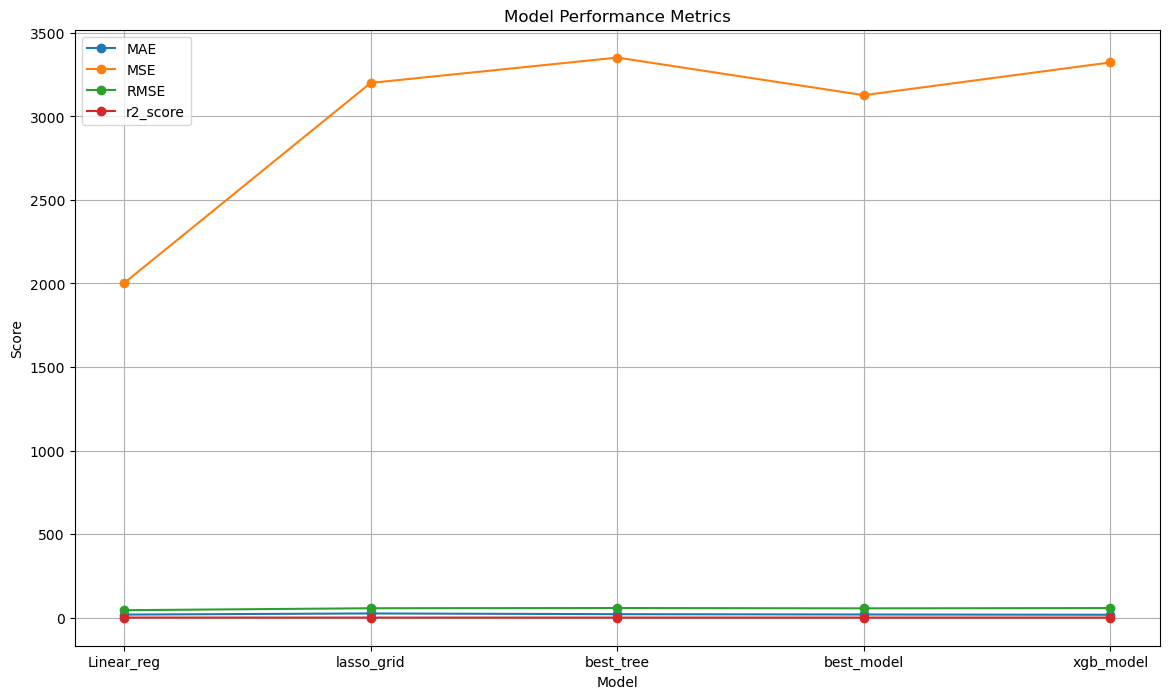

In [117]:
display_result(metrics)

In [118]:
model = ''
val = 0.0
for model_name, model_metrics in metrics.items():
    r2_score = model_metrics['r2_score']
    if isinstance(r2_score, np.float64):
        r2_score = float(r2_score)
    else:
        r2_score = float(r2_score.rstrip('%')) / 100  # Convert percentage string to float

    if r2_score > val:
        val = r2_score
        model = model_name

In [119]:
val

0.7932988053604241

In [120]:
model

'Linear_reg'

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h3>Test the model for few properties</h3>
</div>

In [121]:
def predict_price(loc, sqft, bath, bhk):
    loc_idx = np.where(X.columns==loc)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_idx >=0:
        x[loc_idx] = 1
    return Linear_reg.predict([x])[0]

In [122]:
data.columns

Index(['total_sqft', 'bath', 'price', 'BHK', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=245)

In [123]:
predict_price('location_1st Phase JP Nagar', 1000, 2, 2)

C:\Users\nihar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.0192562181153

In [124]:
predict_price('location_2nd Stage Nagarbhavi', 1500, 4, 4)

C:\Users\nihar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


228.3129100775567

In [125]:
predict_price('location_1st Phase JP Nagar', 1000, 4, 4)

C:\Users\nihar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.17424500681821

In [126]:
predict_price('location_Vittasandra', 1246, 2, 2)

C:\Users\nihar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.13802650354869

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h3>Export the tested model to a pickle file</h3>
</div>

In [127]:
import pickle

In [128]:
with open('bangalore_home_price_model.pickle','wb') as file:
    pickle.dump(Linear_reg, file)

<div style="
    color: white; 
    background-color: purple; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 10px;
    margin-top: 10px;
">
    <h3>Export location and column information to a file that will be useful later on in our prediction application</h3>
</div>

In [129]:
import json

In [130]:
columns = {
    'data_columns':[col.lower() for col in X.columns]
}

In [131]:
with open('bangalore_columns.json','w') as file:
    file.write(json.dumps(columns))

In [132]:
data.columns

Index(['total_sqft', 'bath', 'price', 'BHK', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=245)